# Kivy Workshop / Taller de Kivy
### Objetivo: Construir nuestra primera aplicación para Android con Kivy

# Antes de emepzar

* Este material está hecho sobre Jupyter Notebook, se puede [descargar de Github](bit.ly/tallerkivy).
* La mayoría de los ejemplos de este notebook están preparados como script ejecutables, de manera que al ejecutar 

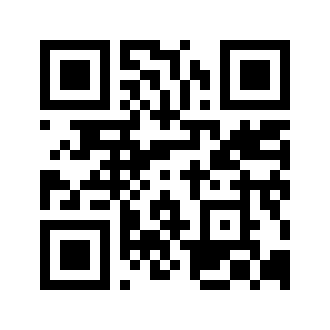

In [25]:
!qr "http://bit.ly/tallerkivy" > images/qr.png
from IPython.display import Image
Image('images/qr.png')

# Kivy 

Kivy es una biblioteca Open source para desarrollo rápido de aplicaciones que hacen uso de interfases de usuarios inovadoras (NUI) como aplicaiones multi touch.
<img src="./images/gs-introduction.png">

# Características
* Acelerado por GPU
* Lenguaje de definición de interfaces sencillo
* Aplicaciones de escritorio (Kiosk) y móviles
* No necesito el emulador de Android para prubeas simples, acelerando el tiempo de desarrollo (si utilizo características nativas, se puede prbar en el dispositivo).

# Instalación

# Windows
`pip install kivy`
# Linux
`apt-get install python-kivy`

# Versión de Desarrollo
`git clone https://github.com/kivy/kivy` requiere paquetes extras:

```
sudo apt-get install -y \
    python-pip \
    build-essential \
    git \
    python \
    python-dev \
    ffmpeg \
    libsdl2-dev \
    libsdl2-image-dev \
    libsdl2-mixer-dev \
    libsdl2-ttf-dev \
    libportmidi-dev \
    libswscale-dev \
    libavformat-dev \
    libavcodec-dev \
    zlib1g-dev
```

# Máquina Virtual

La máquina virtual no tiene aceleración 3D, así que solo la utilizaremos praa compilar.

Compartiremos la carpeta

# Arquitectura
![Arquitectura de Kivy](images/architecture.png)

# Antes de llegar a Android
### Repasemos algunas caracerísticas de Kivy

* Aplicación
* Propiedades
* Lenguaje de Kivy (Kv)

### Al extraer los ejemplos

* Debemos quitar los **cell magics**:
    + `%%writefile`
    + `%%script python...`

# Documentación

La documentación de Kivy es muy buena, abarcando APIs y guías de desarrollo. Existen algunas areas poco documentadas como iOS, pero siempre se agradecen contribuciones al proyecto.
![docs](images/docs.png)

Tenemos una copia en este repositorio en la carpeta docs.

# Primera aplicación Kivy
#### Sin android todavía

In [4]:
%%python
# encoding: utf-8
from __future__ import print_function
from kivy.app import App
from kivy.uix.button import Button

class MyApp(App):
    def saludar(self, ui):
        print(u"Clickeado")
    def build(self):
        btn = Button(
            text="Con F1 verás algo más\n"
            "con Esc salis", 
            on_press=self.saludar,
        )
        return btn
if __name__ == "__main__":
    MyApp().run()

Clickeado
Clickeado
Clickeado
Clickeado


[INFO              ] [Logger      ] Record log in /Users/nahuel/.kivy/logs/kivy_16-11-27_4.txt
[INFO              ] [Kivy        ] v1.9.1
[INFO              ] [Python      ] v2.7.12 (default, Oct 11 2016, 05:20:59) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)]
[INFO              ] [Factory     ] 179 symbols loaded
[INFO              ] [Image       ] Providers: img_tex, img_imageio, img_dds, img_gif, img_sdl2, img_pil (img_ffpyplayer ignored)
[INFO              ] [Text        ] Provider: sdl2
[INFO              ] [OSC         ] using <multiprocessing> for socket
[INFO              ] [Window      ] Provider: sdl2
[INFO              ] [GL          ] OpenGL version <2.1 INTEL-10.20.23>
[INFO              ] [GL          ] OpenGL vendor <Intel Inc.>
[INFO              ] [GL          ] OpenGL renderer <Intel Iris OpenGL Engine>
[INFO              ] [GL          ] OpenGL parsed version: 2, 1
[INFO              ] [GL          ] Shading version <1.20>
[INFO              ] [GL        

# Agregando Layouts

In [8]:
%%script python2 --err stderr
# encoding: utf-8
from __future__ import print_function
from kivy.app import App
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.button import Button
from kivy.uix.label import Label

class MyWidget(BoxLayout):
    def __init__(self):
        super(MyWidget, self).__init__()
        callback = App.get_running_app().saludar
        btn = Button(text=u"alegría a tu", 
                     on_press=callback
                    )
        self.add_widget(Label(text="Dale"))
        self.add_widget(btn)
        self.add_widget(Label(text="cuerpo"))
        self.orientation = 'vertical'
        
class MyApp(App):
    def saludar(self, ui):
        print("Macarena")
    def build(self):
        return MyWidget()
if __name__ == "__main__":
    MyApp().run()

# Utilizando las propiedades

In [10]:
%%script python2 --err stderr
from __future__ import print_function
from kivy.app import App
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.button import Button

class MyWidget(BoxLayout):
    def __init__(self):
        super(MyWidget, self).__init__()
        callback = App.get_running_app().saludar
        btn1 = Button(text="%s" % self.orientation, 
                     on_press=callback
                    )
        self.add_widget(btn1)
        btn2 = Button(text="Cambiar propiedad orientation", 
                      on_press=self.change_layout)
        self.add_widget(btn2)
    def change_layout(self, ui):
        if self.orientation == 'horizontal':
            self.orientation = 'vertical'
        else:
            self.orientation = 'horizontal'

class MyApp(App):
    def saludar(self, ui):
        print("Hola Kivy")
    def build(self):
        return MyWidget()
if __name__ == "__main__":
    MyApp().run()

# Propiadades en Kivy

Las propiedades son el mecanismo de hacer **programación reactiva** o implementar el patrón `Observer` en Kivy.

Lo que en Python haríamos de la siguiente forma:
```python
class MyClass(object):
    def __init__(self):
        super(MyClass, self).__init__()
        self.numeric_var = 1
```
en Kivy, se implementaría de esta manera:
```python
class MyClass(EventDispatcher):
    numeric_var = NumericProperty(1)
```

Las propiedades que implementa Kivy son:

* [NumericProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.NumericProperty)
* [StringProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.StringProperty) 
* [ListProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.ListProperty)
* [ObjectProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.ObjectProperty)
* [BooleanProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.BooleanProperty)
* [BoundedNumericProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.BoundedNumericProperty)
* [OptionProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.OptionProperty)
* [ReferenceListProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.ReferenceListProperty)
* [AliasProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.AliasProperty)
* [DictProperty](https://kivy.org/docs/api-kivy.properties.html#kivy.properties.DictProperty)

# El lenguaje de Diesño `Kv`

Kivy proveé un lenguaje de diseño preparado para hacer GUIs de manera **simple** y **escalable**. 

Simplifica la separación de la interfase de la implementación de la lógica, adhiriendose al principio de separación de responsabilidades.

![](images/gs-lang.png)


## Utilización del lenguaje 

Exiten varias formas de vincular un archivo `kv` a una aplicación o widget:

* Utilizando el mismo nombre que la aplicación **`my.kv -> MyApp`**

* Utilizando la clase **Builder**
    + `Builder.load_file('ruta/a/archivo.kv')`
    + `Builder.load_string(cadena)`

## Reglas
Existen dos tipos de reglas, las de elemento raíz **root** y las de **clase**: 
### root
```yaml
clase_root:
```
### clases
```yaml
<Clase>:
```

### Variables Globales provistas por Kivy

* **`app`** referencia a la aplicación
* **`root`** referencia al widget raíz
* **`self`** referencia al widget actual

## Gerarquía

```yaml

MyRootWidget:
    BoxLayout:
        Button:
        Button:
```
es equivalente a:

```python
root = MyRootWidget()
box = BoxLayout()
box.add_widget(Button())
box.add_widget(Button())
root.add_widget(box)
```

## Argumentos
La expresión `grid = GridLayout(cols=3)` se puede definir en kv de la siguiente manera:

```yaml
GridLayout:
    cols: 3
```

In [20]:
%%script python2 --err stderr
from kivy.app import App
from kivy.lang import Builder
#from kivy.uix.gridlayout import GridLayout
from kivy.uix.boxlayout import BoxLayout

class MyGrid(BoxLayout):
    pass

Builder.load_string('''
<MyGrid>:
    size: root.size
    pos: root.pos
    # cols: 3
    Button:
        text: ":)"
        on_press: print("Me apretaste")
    TextInput:
        text: "Layout"
    Button:
        text: "en"
    Button:
        text: "kv"
    BoxLayout:
        Button:
            text: "Anidado"
        Label:
            text: "anidado"
''')

class MyApp(App):
    def build(self):
        return MyGrid()

MyApp().run()


In [18]:
print(stderr)

[INFO              ] [Logger      ] Record log in /Users/nahuel/.kivy/logs/kivy_16-11-27_17.txt
[INFO              ] [Kivy        ] v1.9.1
[INFO              ] [Python      ] v2.7.12 (default, Oct 11 2016, 05:20:59) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)]
[INFO              ] [Factory     ] 179 symbols loaded
[INFO              ] [Image       ] Providers: img_tex, img_imageio, img_dds, img_gif, img_sdl2, img_pil (img_ffpyplayer ignored)
 Traceback (most recent call last):
   File "<stdin>", line 4, in <module>
 ImportError: cannot import name BoxLayout



### Argumentos Observables

La expresión: 

```python
grid = GridLayout(cols=len(self.data))
self.bind(data=grid.setter('cols'))
```

puede escribirse en kv de la siguiente manera:

```yaml
GridLayout:
    cols: len(root.data)
```

## Referencias

Se pueden definir atributos ID para los widgets, estos son útiles para hacer referencias tanto en Python como en el lenguaje Kv.

El siguiente ejemplo combina atributos observables y referencias por `id`.


In [24]:
%%script python2 --err stderr
from kivy.app import App
from kivy.lang import Builder
from kivy.uix.boxlayout import BoxLayout

class MyLaoyout(BoxLayout):
    pass

Builder.load_string('''
<MyLaoyout>:
    size: root.size
    pos: root.pos
    Slider:
        min: 0
        max: 10
        id: my_slider

    Label:
        text: '%s' % my_slider.value
    Button:
        text: "Solo si > .5"
        disabled: not my_slider.value > 5
''')

class MyApp(App):
    def build(self):
        return MyLaoyout()

MyApp().run()


## Manejo de eventos

Podemos definir de la siguiente manera un *handler* ante un evento de click:
```yaml
Button:
    text: "Hola"
    on_press: app.metodo()
```

In [28]:
%%script python2 --err stderr
# encoding: utf-8
from kivy.app import App
from kivy.lang import Builder
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.popup import Popup
from kivy.uix.label import Label

class MyLaoyout(BoxLayout):
    pass

Builder.load_string(u'''
<MyLaoyout>:
    size: root.size
    pos: root.pos
    Slider:
        min: 0
        max: 10
        id: my_slider
    Button:
        text: 'El slider está %s' % my_slider.value
        on_press: app.saludar()
''')

class MyApp(App):
    def build(self):
        return MyLaoyout()
    
    def saludar(self, ui=None):
        popup = Popup(title='Test popup',
            content=Label(text='Hello world'),
            size_hint=(None, None), size=(400, 400))
        popup.open()

MyApp().run()

In [30]:
print(stderr)

[INFO              ] [Logger      ] Record log in /Users/nahuel/.kivy/logs/kivy_16-11-27_27.txt
[INFO              ] [Kivy        ] v1.9.1
[INFO              ] [Python      ] v2.7.12 (default, Oct 11 2016, 05:20:59) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)]
[INFO              ] [Factory     ] 179 symbols loaded
[INFO              ] [Image       ] Providers: img_tex, img_imageio, img_dds, img_gif, img_sdl2, img_pil (img_ffpyplayer ignored)
[INFO              ] [Text        ] Provider: sdl2
[INFO              ] [OSC         ] using <multiprocessing> for socket
[INFO              ] [Window      ] Provider: sdl2
[INFO              ] [GL          ] OpenGL version <2.1 INTEL-10.20.23>
[INFO              ] [GL          ] OpenGL vendor <Intel Inc.>
[INFO              ] [GL          ] OpenGL renderer <Intel Iris OpenGL Engine>
[INFO              ] [GL          ] OpenGL parsed version: 2, 1
[INFO              ] [GL          ] Shading version <1.20>
[INFO              ] [GL       

# Control de dibujo en pantalla
Kivy permite definir las operaciones de pintado de pantalla bajo la propiedad canvas, o el método canvas.

In [31]:
%%script python2 --err stderr
# encoding: utf-8
from kivy.app import App
from kivy.lang import Builder
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.popup import Popup
from kivy.uix.label import Label

class MyLaoyout(BoxLayout):
    def saludar(self, ui):
        pass

Builder.load_string('''
<MyLaoyout>:
    
    canvas:
        Color:
            rgba: 0.3, 0.2, 0.5, 1
        Rectangle:
            size: self.size
            pos: self.pos
    Button:
        canvas:
            Rectangle:
                size: self.size
                pos: self.pos
                source: "images/icon.png"
        size_hint: .5, .5
''')

class AlucinApp(App):
    def build(self):
        return MyLaoyout()

AlucinApp().run()

# Dfeiniendo Sub-Clases en `kv`
Kivy nos permite utilizar una sintaxis especial para generar sub-clases de los widgets.

La sintaxis es `<NombreClase@ClaseBase>`, no es necesario definirlo antes.



In [40]:
%%script python2 --err stderr
# encoding: utf-8
from kivy.app import App
from kivy.lang import Builder
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.popup import Popup
from kivy.uix.button import Button
from kivy.uix.label import Label

class MyLaoyout(BoxLayout):
    def saludar(self, ui):
        pass
class MiBoton(Button):
    def cuando_me_presionas(self):
        popup = Popup(title='Test popup',
            content=Label(text=self.texto),
            size_hint=(None, None), size=(400, 400))
        popup.open()
        
Builder.load_string('''
<MyLaoyout>:   
    canvas:
        Color:
            rgba: 0.3, 0.2, 0.5, 1
        Rectangle:
            size: self.size
            pos: self.pos
    MiBoton:
        texto: "Primer widget"
    MiBoton:
        texto: "Segundo Widget"
    
<MiBoton@Button>:
    canvas:
        Rectangle:
            size: self.size
            pos: self.pos
            source: "images/icon.png"
    size_hint: .5, .2
    on_press: self.cuando_me_presionas()
''')

class AlucinApp(App):
    def build(self):
        return MyLaoyout()

AlucinApp().run()

Purge log fired. Analysing...
Purge 111 log files
Purge finished!


# Utilizando propiedades en el `canvas:`

In [50]:
%%script python2 --err stderr
# encoding: utf-8
from kivy.app import App
from kivy.lang import Builder
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.popup import Popup
from kivy.uix.label import Label
import random, time

class MyLaoyout(BoxLayout):
    def saludar(self, ui):
        pass

Builder.load_string('''
<MyLaoyout>:
    r: 1
    g: 1
    b: 1
    a: 1
    canvas:
        Color:
            rgba: self.r, self.g, self.b, self.a
        Rectangle:
            size: self.size
            pos: self.pos
    Button:
        canvas:
            Rectangle:
                size: self.size
                pos: self.pos
                source: "images/icon.png"
        size_hint: .5, .5
        on_press: app.sacudir_colores()        
''')

def aleatorio():
    rand = random.randrange(1, 100)
    return rand * 0.01

class AlucinApp(App):
    def build(self):
        random.seed(time.time())
        return MyLaoyout()
    def sacudir_colores(self):
        self.root.r = aleatorio()
        self.root.g = aleatorio()
        self.root.b = aleatorio()
        self.root.a = aleatorio()
        
AlucinApp().run()

## Combinando...

In [1]:
%%script python2 --err stderr
# encoding: utf-8
from kivy.app import App
from kivy.lang import Builder
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.popup import Popup
from kivy.uix.label import Label
import random, time

class MyLaoyout(BoxLayout):
    def saludar(self, ui):
        pass

Builder.load_string('''
<MyLaoyout>:
    
    orientation: 'vertical'
    Label:
        text: "Rojo"
    Slider:
        id: red
        min: 0
        max: 1
        step: 0.01
    Label:
        text: "Verde"
    Slider:
        id: green
        min: 0
        max: 1
        step: 0.01
    Label:
        text: "Azul"
    Slider:
        id: blue
        min: 0
        max: 1
        step: 0.01
    Label:
        canvas:
            Color:
                rgba: red.value, green.value, blue.value, 1
            Rectangle:
                size: self.size
                pos: self.pos
        text: '%2x%2x%2x' % (red.value, green.value, blue.value)
''')

def aleatorio():
    rand = random.randrange(1, 100)
    return rand * 0.01

class AlucinApp(App):
    def build(self):
        random.seed(time.time())
        return MyLaoyout()
    def sacudir_colores(self):
        self.root.r = aleatorio()
        self.root.g = aleatorio()
        self.root.b = aleatorio()
        self.root.a = aleatorio()
        
AlucinApp().run()

# Administración de Ventanas

In [43]:
%%script python2 --err stderr
# encoding: utf-8
from kivy.app import App
from kivy.lang import Builder
from kivy.uix.screenmanager import ScreenManager, Screen

# Create both screens. Please note the root.manager.current: this is how
# you can control the ScreenManager from kv. Each screen has by default a
# property manager that gives you the instance of the ScreenManager used.
Builder.load_string("""
<MenuScreen>:
    name: "first"
    BoxLayout:
        orientation: 'vertical'
        GridLayout:
            size_hint: 1,.4
            padding_bottom: .8
            padding_x: 1000
            padding: 20
            cols: 2
            Label:
                text: "nombre"
            TextInput
            Label:
                text: "pass"
            TextInput
            
        Button:
            text: "OK"
            on_press: root.current = "second"
        
<SettingsScreen>:
    name: "second"
    BoxLayout:
        Button:
            text: 'My settings button'
        Button:
            text: 'Back to menu'
            on_press: print(root.current); root.current = 'menu'
""")

# Declare both screens
class MenuScreen(Screen):
    pass

class SettingsScreen(Screen):
    pass

# Create the screen manager
sm = ScreenManager()
sm.add_widget(MenuScreen(name='menu'))
sm.add_widget(SettingsScreen(name='settings'))

class TestApp(App):

    def build(self):
        return sm

if __name__ == '__main__':
    TestApp().run()

In [44]:
print(stderr)

[INFO              ] [Logger      ] Record log in /Users/nahuel/.kivy/logs/kivy_16-11-26_28.txt
[INFO              ] [Kivy        ] v1.9.1
[INFO              ] [Python      ] v2.7.12 (default, Oct 11 2016, 05:20:59) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)]
[INFO              ] [Factory     ] 179 symbols loaded
[INFO              ] [Image       ] Providers: img_tex, img_imageio, img_dds, img_gif, img_sdl2, img_pil (img_ffpyplayer ignored)
[INFO              ] [OSC         ] using <multiprocessing> for socket
[INFO              ] [Window      ] Provider: sdl2
[INFO              ] [GL          ] OpenGL version <2.1 INTEL-10.20.23>
[INFO              ] [GL          ] OpenGL vendor <Intel Inc.>
[INFO              ] [GL          ] OpenGL renderer <Intel Iris OpenGL Engine>
[INFO              ] [GL          ] OpenGL parsed version: 2, 1
[INFO              ] [GL          ] Shading version <1.20>
[INFO              ] [GL          ] Texture max size <16384>
[INFO              ] 

In [114]:
!git add -u; git commit -m "Update `date`"; git push

[master 70f9890] Update Sun Nov 20 18:41:50 ART 2016
 2 files changed, 38 insertions(+), 135 deletions(-)
Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 807 bytes | 0 bytes/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To github.com:D3f0/kivyworkshop.git
   3e04854..70f9890  master -> master
